# Accessing NED data via VO services 

- The following were tested using:
    - OS X 10.10.5
    - conda 4.5.4
    - python 3.6.4
    - ipython 6.2.1
- Modules used in this notebook - run the following to test if you have all the required modules installed

In [1]:
import json
import requests
import urllib.parse
import io
import matplotlib.pyplot as plt
from astropy.table import Table

# VO TAP queries via astroquery:
from astroquery.utils.tap.core import TapPlus

# VO TAP queries via pyvo:
import pyvo as vo


In [46]:
import numpy as np

- Last tested on: 15 June 2018
- Additional information see: [link to docs](https://ned.ipac.caltech.edu)

## Contents:

(1) <a href='#ObjectLookup'>Object Lookup</a> - Find basic object information using object name

(2) <a href='#TAP_cone'>TAP - Cone Search</a>

(3) <a href='#TAP_poly'>TAP - Polygon Search</a>

(4) <a href='#TAP_poly_z'>TAP - Polygon Search with Redshift Constraint</a>

(5) <a href='#SED_plot'>SED Plot</a> - Fetch photometry data for a given list of object names and plot the SED

<a id='ObjectLookup'></a>

## (1) Object Lookup - Find basic object information using object name

In [2]:
# Use NED Object Lookup api to fetch basic object information for given object name
# Documentation: http://vo.ned.ipac.caltech.edu/ui/Documents/ObjectLookup

import json
import requests
import urllib.parse

object_name  = 'cyg a'
encoded_name = urllib.parse.quote_plus(object_name)   # need to encode special characters in object name 

NED_object_lookup  = "http://ned.ipac.caltech.edu/srs/ObjectLookup?"
object_name_packet = 'json=' + json.dumps({"name":{"v":encoded_name}}, separators=(',',':'))
NED_object_lookup_response = requests.post(NED_object_lookup, data = object_name_packet)
if NED_object_lookup_response.status_code == 200:
    ned_object_basic_info = json.loads(NED_object_lookup_response.content)
    print(json.dumps(ned_object_basic_info, sort_keys=True,indent=4, separators=(',', ': ')))


{
    "Copyright": "(C) 2025 California Institute of Technology",
    "Interpreted": {
        "Name": "Cygnus A"
    },
    "NameResolver": "NED-NNS",
    "Preferred": {
        "Name": "Cygnus A",
        "ObjType": {
            "RefCode": null,
            "Value": "G"
        },
        "Position": {
            "Dec": 40.73391556,
            "PosAngle": 0.0,
            "RA": 299.86815,
            "RefCode": "2021AJ....162..121H",
            "UncSemiMajor": 6.944444444e-08,
            "UncSemiMinor": 6.944444444e-08
        },
        "Redshift": {
            "QualityFlag": "UUN ",
            "RefCode": "2020MNRAS.493.3911H",
            "Uncertainty": 6.7e-05,
            "Value": 0.0562
        }
    },
    "QueryTime": "Fri Jan 31 22:22:28 2025",
    "ResultCode": 3,
    "StatusCode": 100,
    "Supplied": "cyg a",
    "Version": "2.1"
}


IC 5371

In [3]:
object_name  = 'IC 5371'
encoded_name = urllib.parse.quote_plus(object_name)   # need to encode special characters in object name 

NED_object_lookup  = "http://ned.ipac.caltech.edu/srs/ObjectLookup?"
object_name_packet = 'json=' + json.dumps({"name":{"v":encoded_name}}, separators=(',',':'))
NED_object_lookup_response = requests.post(NED_object_lookup, data = object_name_packet)
if NED_object_lookup_response.status_code == 200:
    ned_object_basic_info = json.loads(NED_object_lookup_response.content)
    print(json.dumps(ned_object_basic_info, sort_keys=True,indent=4, separators=(',', ': ')))

{
    "Copyright": "(C) 2025 California Institute of Technology",
    "Interpreted": {
        "Name": "IC 5371"
    },
    "NameResolver": "NED-NNS",
    "Preferred": {
        "Name": "IC 5371",
        "ObjType": {
            "RefCode": null,
            "Value": "G"
        },
        "Position": {
            "Dec": 32.8319804,
            "PosAngle": 90.0,
            "RA": 0.0616522,
            "RefCode": "2013wise.rept....1C",
            "UncSemiMajor": 2.465277778e-05,
            "UncSemiMinor": 2.395833333e-05
        },
        "Redshift": {
            "QualityFlag": "SUN ",
            "RefCode": "1987Afz....26....5K",
            "Uncertainty": 9.99999975e-05,
            "Value": 0.0313000008
        }
    },
    "QueryTime": "Fri Jan 31 22:23:19 2025",
    "ResultCode": 3,
    "StatusCode": 100,
    "Supplied": "IC 5371",
    "Version": "2.1"
}


In [14]:
ned_object_basic_info

{'QueryTime': 'Fri Jan 31 22:23:19 2025',
 'Copyright': '(C) 2025 California Institute of Technology',
 'Version': '2.1',
 'Supplied': 'IC 5371',
 'NameResolver': 'NED-NNS',
 'Interpreted': {'Name': 'IC 5371'},
 'Preferred': {'Name': 'IC 5371',
  'Position': {'RA': 0.0616522,
   'Dec': 32.8319804,
   'UncSemiMajor': 2.465277778e-05,
   'UncSemiMinor': 2.395833333e-05,
   'PosAngle': 90.0,
   'RefCode': '2013wise.rept....1C'},
  'ObjType': {'Value': 'G', 'RefCode': None},
  'Redshift': {'Value': 0.0313000008,
   'Uncertainty': 9.99999975e-05,
   'RefCode': '1987Afz....26....5K',
   'QualityFlag': 'SUN '}},
 'StatusCode': 100,
 'ResultCode': 3}

In [17]:
print(ned_object_basic_info.get('Preferred'))

{'Name': 'IC 5371', 'Position': {'RA': 0.0616522, 'Dec': 32.8319804, 'UncSemiMajor': 2.465277778e-05, 'UncSemiMinor': 2.395833333e-05, 'PosAngle': 90.0, 'RefCode': '2013wise.rept....1C'}, 'ObjType': {'Value': 'G', 'RefCode': None}, 'Redshift': {'Value': 0.0313000008, 'Uncertainty': 9.99999975e-05, 'RefCode': '1987Afz....26....5K', 'QualityFlag': 'SUN '}}


In [18]:
print(ned_object_basic_info.get('Preferred').get('Position'))

{'RA': 0.0616522, 'Dec': 32.8319804, 'UncSemiMajor': 2.465277778e-05, 'UncSemiMinor': 2.395833333e-05, 'PosAngle': 90.0, 'RefCode': '2013wise.rept....1C'}


In [21]:
print(ned_object_basic_info.get('Preferred').get('Position').get('UncSemiMajor'))

2.465277778e-05


In [22]:
print(ned_object_basic_info.get('Preferred').get('Position').get('UncSemiMinor'))

2.395833333e-05


In [23]:
print(ned_object_basic_info.get('Preferred').get('Position').get('PosAngle'))

90.0


### try with astroquery

In [25]:
from astroquery.ipac.ned import Ned
result_table = Ned.query_object("NGC 224")
print(result_table) # an astropy.table.Table

No. Object Name     RA     ... Redshift Points Diameter Points Associations
                 degrees   ...                                             
--- ----------- ---------- ... --------------- --------------- ------------
  1 MESSIER 031    10.6848 ...              48              13            2


In [26]:
result_table = Ned.query_object("IC 5371")
print(result_table)

No. Object Name     RA     ... Redshift Points Diameter Points Associations
                 degrees   ...                                             
--- ----------- ---------- ... --------------- --------------- ------------
  1     IC 5371    0.06165 ...               3               2            0


In [28]:
result_table

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,IC 5371,0.06165,32.83198,G,9384.0,0.0313,SUN,15.7,--,15,0,28,8,3,2,0


In [52]:
# result_table = Ned.get_table("NGC 224", table='positions')
# result_table = Ned.get_table("IC 5371", table='positions')
# result_table = Ned.get_table("IC 5377", table='positions')
# result_table

In [55]:
# result_table = Ned.get_table("NGC 224", table='diameters')
# result_table = Ned.get_table("IC 5371", table='diameters')
result_table = Ned.get_table("IC 5377", table='diameters')
# result_table = Ned.get_table("NGC 7807", table='diameters')
result_table

No.,Frequency targeted,Refcode,Major Axis,Major Axis Flag,Major Axis Unit,Minor Axis,Minor Axis Flag,Minor Axis Unit,Axis Ratio,Axis Ratio Flag,Major Axis Uncertainty,Ellipticity,Eccentricity,Position Angle,Equinox,Reference Level,NED Frequency,NED Major Axis,NED Major Axis Uncertainty,NED Axis Ratio,NED Ellipticity,NED Eccentricity,NED cos-1_axis_ratio,NED Position Angle,NED Minor Axis,Minor Axis Uncertainty,NED Minor Axis Uncertainty,Axis Ratio Uncertainty,NED Axis Ratio Uncertainty,Ellipticity Uncertainty,NED Ellipticity Uncertainty,Eccentricity Uncertainty,NED Eccentricity Uncertainty,Position Angle Uncertainty,NED Position Angle Uncertainty,Significance,Frequency,Frequency Unit,Frequency Mode,Detector Type,Fitting Technique,Features,Measured Quantity,Measurement Qualifiers,Targeted RA,Targeted DEC,Targeted Equinox,NED Qualifiers,NED Comment
,,,,,,,,,,,,,,deg,,,Hz,arcsec,arcsec,,,,,deg,arcsec,,arcsec,,,,,,,,deg,,,,,,,,,,,,,,
int32,object,object,float64,object,object,float64,object,object,float64,object,float64,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,object,object,object,object,object,object,object,object,object,object,object
1,POSS1 103a-O,1973UGC...C...0000N,1.3,,arcmin,0.7,,arcmin,--,,--,--,--,--,,About 25.0 B-mag arcsec^-2^,740000000000000.0,78.0,--,0.54,0.462,0.551056,57.0,--,42.0,--,--,--,--,--,--,--,--,--,--,No uncertainty reported,4050.0,A,Broad-band detector (e.g. photographic plate),"Photographic plate, print, or film",Eye estimate,,"""Outer"" diameter",,235930.,+161900.,B1950,"From new, raw data",
2,POSS1 103a-O,1964MCG2..C...0000V,0.3,,arcmin,0.2,,arcmin,--,,--,--,--,--,,Intermed. surface brightness,740000000000000.0,18.0,--,0.67,0.333,0.384189,48.0,--,12.0,--,--,--,--,--,--,--,--,--,--,No uncertainty reported,4050.0,A,Broad-band detector (e.g. photographic plate),"Photographic plate, print, or film",Eye estimate,,"""Inner"" diameter",,235930,+1618,B1950,"From new, raw data",
3,POSS1 103a-O,1964MCG2..C...0000V,0.7,,arcmin,0.4,,arcmin,--,,--,--,--,--,,Very low surface brightness,740000000000000.0,42.0,--,0.57,0.429,0.508249,55.0,--,24.0,--,--,--,--,--,--,--,--,--,--,No uncertainty reported,4050.0,A,Broad-band detector (e.g. photographic plate),"Photographic plate, print, or film",Eye estimate,,"""Outer"" diameter",,235930,+1618,B1950,"From new, raw data",
4,"RC3 D_25, R_25 (blue)",1991RC3.9.C...0000d,1.02,,log(2a) + 1,--,,,0.25,log(a/b),0.06,--,--,--,,25.0 B-mag arcsec^-2^,681000000000000.0,62.8,9.3,0.56,0.438,0.519937,56.0,--,35.29,--,--,0.05,0.07,--,--,--,--,--,--,Mean error,4400.0,A,Broad-band detector (e.g. photographic plate),"Photographic plate, print, or film",Eye estimate,,Isophotal diameter,,000200.0,+163500.,J2000,Homogenized from previously published data,
5,RC3 D_0 (blue),1991RC3.9.C...0000d,1.02,,log(2a) + 1,--,,,--,,--,--,--,--,,25.0 B-mag arcsec^-2^,681000000000000.0,62.8,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,No uncertainty reported,4400.0,A,Broad-band detector (e.g. photographic plate),"Photographic plate, print, or film",Eye estimate,,Isophotal diameter,,000200.0,+163500.,J2000,Homogenized from previously published data,Extinction and inclination corrected.


In [39]:
result_table.colnames

['No.',
 'Frequency targeted',
 'Refcode',
 'Major Axis',
 'Major Axis Flag',
 'Major Axis Unit',
 'Minor Axis',
 'Minor Axis Flag',
 'Minor Axis Unit',
 'Axis Ratio',
 'Axis Ratio Flag',
 'Major Axis Uncertainty',
 'Ellipticity',
 'Eccentricity',
 'Position Angle',
 'Equinox',
 'Reference Level',
 'NED Frequency',
 'NED Major Axis',
 'NED Major Axis Uncertainty',
 'NED Axis Ratio',
 'NED Ellipticity',
 'NED Eccentricity',
 'NED cos-1_axis_ratio',
 'NED Position Angle',
 'NED Minor Axis',
 'Minor Axis Uncertainty',
 'NED Minor Axis Uncertainty',
 'Axis Ratio Uncertainty',
 'NED Axis Ratio Uncertainty',
 'Ellipticity Uncertainty',
 'NED Ellipticity Uncertainty',
 'Eccentricity Uncertainty',
 'NED Eccentricity Uncertainty',
 'Position Angle Uncertainty',
 'NED Position Angle Uncertainty',
 'Significance',
 'Frequency',
 'Frequency Unit',
 'Frequency Mode',
 'Detector Type',
 'Fitting Technique',
 'Features',
 'Measured Quantity',
 'Measurement Qualifiers',
 'Targeted RA',
 'Targeted DEC'

In [40]:
result_table['NED Major Axis']

27.8
48.9
66.0
37.58
44.16
50.7
23.44
27.86
34.67
17.38
15.85


In [41]:
result_table['NED Position Angle']

65.0
65.0
--
76.0
76.0
76.0
76.0
76.0
76.0
76.0
--


In [42]:
print(len(result_table))

14


In [43]:
result_table['Frequency targeted']

K_s (2MASS isophotal)
"K_s (2MASS ""total"")"
"ESO-Uppsala ""Quick Blue"" IIa-O"
"ESO-LV ""Quick Blue"" IIa-O"
"ESO-LV ""Quick Blue"" IIa-O"
"ESO-LV ""Quick Blue"" IIa-O"
"ESO-LV ""Quick Blue"" IIa-O"
"ESO-LV ""Quick Blue"" IIa-O"
"ESO-LV ""Quick Blue"" IIa-O"
"ESO-LV ""Quick Blue"" IIa-O"
"ESO-LV ""Quick Blue"" IIa-O"


In [47]:
temp = np.asarray(result_table['Frequency targeted'], dtype='str')

In [48]:
print(temp)

['K_s (2MASS isophotal)' 'K_s (2MASS "total")'
 'ESO-Uppsala "Quick Blue" IIa-O' 'ESO-LV "Quick Blue" IIa-O'
 'ESO-LV "Quick Blue" IIa-O' 'ESO-LV "Quick Blue" IIa-O'
 'ESO-LV "Quick Blue" IIa-O' 'ESO-LV "Quick Blue" IIa-O'
 'ESO-LV "Quick Blue" IIa-O' 'ESO-LV "Quick Blue" IIa-O'
 'ESO-LV "Quick Blue" IIa-O' 'ESO-LV "Quick Blue" IIa-O'
 'ESO-LV "Quick Blue" IIa-O' 'ESO-LV IIIa-F']


In [49]:
for tmp in temp:
    if tmp.find('isophotal') > -1:
        print(tmp)

K_s (2MASS isophotal)


<a id='TAP_cone'></a>

## (2) TAP - Cone Search

In [ ]:
# Using NED TAP service with previously retrieved NED object position to perform 0.2 arcmin cone search
# Documentation: https://ned.ipac.caltech.edu/tap/

ned_tab     = 'https://ned.ipac.caltech.edu/tap'
table_name  = 'ned_objdir'
columns     = 'prefname,ra,dec,z,zflag'
coord_sys   = 'J2000'
coord_ra    = 299.8681525   # From previous example - ned_object_basic_info['Preferred']['Position']['RA']   
coord_dec   =  40.73391556  # From previous example - ned_object_basic_info['Preferred']['Position']['Dec']
sr_deg      = 0.2 / 60              # 0.2 arcmin search radius
cone        = 'CONTAINS(POINT(\'' + str(coord_sys) + '\', ra, dec),CIRCLE(\'' + str(coord_sys) + '\',' + str(coord_ra) + ',' + str(coord_dec) + ',' + str(sr_deg) + ' ))=1'
query       = 'SELECT ' + columns + ' FROM ' + table_name + ' WHERE ' + cone

# Using astroquery

from astroquery.utils.tap.core import TapPlus
ned = TapPlus(url=ned_tab)
job = ned.launch_job_async(query)
out = job.get_results()
out.pprint()

# Using PyVO

import pyvo as vo
ned_TAP = vo.dal.TAPService(ned_tab)
ned_out = ned_TAP.search(query)
ned_out.table

<a id='TAP_poly'></a>

## (3) TAP - Polygon Search

In [ ]:
# Using NED TAP service to perform polygon search for object count arount M51
# Documentation: https://ned.ipac.caltech.edu/tap/

ned_tab     = 'https://ned.ipac.caltech.edu/tap'
table_name  = 'ned_objdir'
columns     = 'count(*)'
coord_sys   = 'J2000'
polygon     = 'CONTAINS(POINT(\'' + str(coord_sys) + '\',ra,dec),POLYGON(\'' + str(coord_sys) + '\',202.333,47.033,202.667,47.033,202.667,47.367,202.333,47.367))=1'
query       = 'SELECT ' + columns + ' FROM ' + table_name + ' WHERE ' + polygon

# Using astroquery

from astroquery.utils.tap.core import TapPlus
ned = TapPlus(url=ned_tab)
job = ned.launch_job_async(query)
out = job.get_results()
out.pprint()

# Using PyVO

import pyvo as vo
ned_TAP = vo.dal.TAPService(ned_tab)
ned_out = ned_TAP.search(query)
ned_out.table

<a id='TAP_poly_z'></a>

## (4) TAP - Polygon Search with redshift constraint

In [ ]:
# Using NED TAP service to perform polygon search for object count arount M51 for objects within |dcz| = 500 km/s
# Documentation: https://ned.ipac.caltech.edu/tap/

ned_tab     = 'https://ned.ipac.caltech.edu/tap'
table_name  = 'ned_objdir'
columns     = 'count(*)'
coord_sys   = 'J2000'
polygon     = 'CONTAINS(POINT(\'' + str(coord_sys) + '\',ra,dec),POLYGON(\'' + str(coord_sys) + '\',202.333,47.033,202.667,47.033,202.667,47.367,202.333,47.367))=1'
z_range     = 'z BETWEEN 0.000333 AND 0.003667'
query       = 'SELECT ' + columns + ' FROM ' + table_name + ' WHERE ' + polygon + ' AND ' + z_range

# Using astroquery

from astroquery.utils.tap.core import TapPlus
ned = TapPlus(url=ned_tab)
job = ned.launch_job_async(query)
out = job.get_results()
out.pprint()

# Using PyVO

import pyvo as vo
ned_TAP = vo.dal.TAPService(ned_tab)
ned_out = ned_TAP.search(query)
ned_out.table

<a id='SED_plot'></a>

## (5) SED Plot - Fetch photometry data for a given list of object names and plot the SED

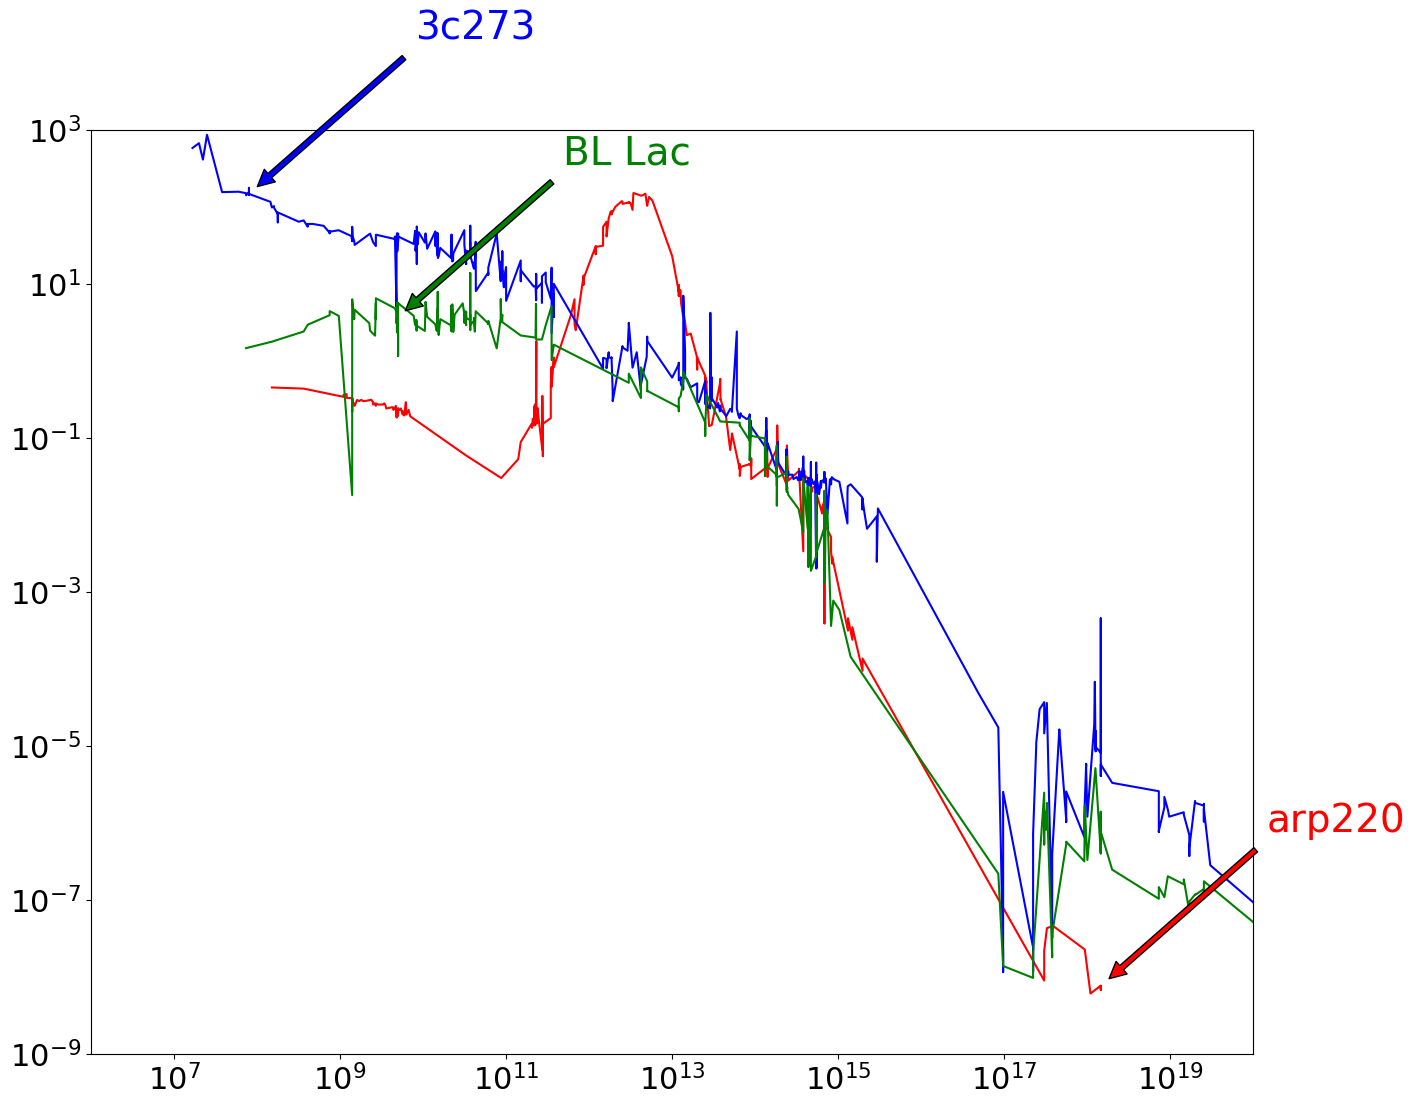

In [24]:
# Using NED SED service 

import io
import requests
import urllib.parse
import matplotlib.pyplot as plt
from astropy.table import Table

object_names = ('arp220','3c273','BL Lac')
color        = ('r', 'b', 'g')

NED_sed  = 'http://vo.ned.ipac.caltech.edu/services/accessSED?'

plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 22})

i=0
for name in object_names:
    paramters = { 'REQUEST':'getData','TARGETNAME':name }
    NED_sed_response = requests.get(NED_sed, params = paramters)
    if NED_sed_response.status_code == 200:
        ned_data_table = Table.read(io.BytesIO(NED_sed_response.content))
        x=ned_data_table['DataSpectralValue']
        y=ned_data_table['DataFluxValue']
        plt.plot(x, y, color[i])
        j=-i*15
        plt.annotate(name, xy=(x[j],y[j]), xytext=(x[j]*100,y[j]*100),arrowprops=dict(facecolor=color[i], shrink=0.05),color=color[i], fontsize=28)
        i+=1
plt.xlim(1e6,1e20)
plt.ylim(1e-9,1e3)
plt.yscale('log')
plt.xscale('log')
plt.show()
